In [3]:
import numpy as np
import scipy as s
import matplotlib.pyplot as plt
%matplotlib inline

##  Matrices

Matrices are the cannonical data structure in machine learning and a lot of artificial intelligence theory. Computationally a matrix is just a 2dimensional array however they are used to transform (rotate, shear and change) the shape of objects.

## Rotation Matirx

When applied to a vector $\in R^{2}$  ( $x,y$ cartesian coordinates) it rotates it clockwise by an angle $\theta$  (or rotates the coordinate space in a clockwise direction) .

\begin{equation}
R =
\begin{bmatrix}
cos(\theta) & sin(\theta) \\
-sin(\theta) &  cos(\theta)
\end{bmatrix}
\end{equation}

Rotation is applied via matrix multiplication which is the main operation we are interested in with matrices in numpy this is carried out via $R.dot(v)$ where $v$ is the vector we are rotating :

\begin{equation}
R \cdot \begin{bmatrix}
x  \\
y
\end{bmatrix}
\end{equation}


In [1]:
# Simple function to generate a rotation matrix
def rotation_matirx(theta=45):
    theta =  theta * np.pi / 180.0
    return np.array([[np.cos(theta), np.sin(theta)],
                     [-np.sin(theta), np.cos(theta)]])

# simple function that generates a bunch of x,y coordinates lying in a square
# note that since its generated by the equation |x| + |y| <= it will be rotated by 45 degrees
# which is convinient
def sample_square_points(l=1, size=1000):
    x = []; y = []
    while(size >=0):
        x1,y1 = np.random.uniform(-1,1, size=2)
        if np.abs(x1) + np.abs(y1) <= l:
            x.append(x1)
            y.append(y1)
            size -= 1
    return x,y 

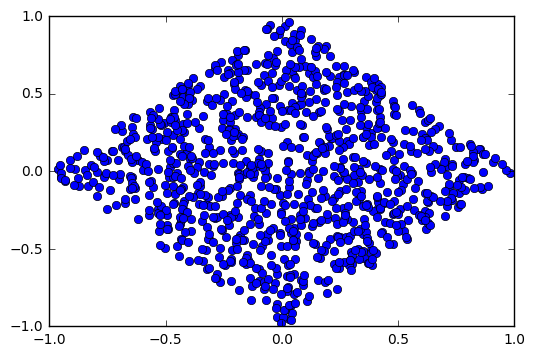

In [4]:
x ,y = sample_square_points()
plt.plot(x,y,"o")

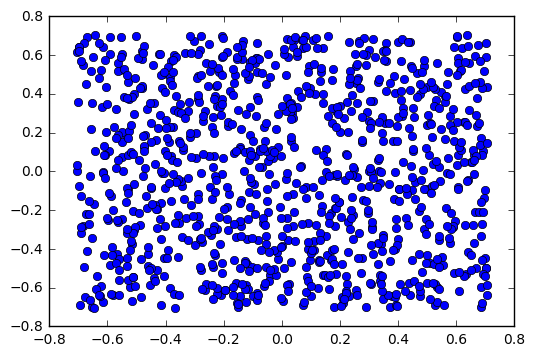

In [5]:
# Now we can use the knowledge gained about rotation matrices to reverse this issue
R= rotation_matirx() # 45 degree rotation
# loop over all (x,y) pairs and rotate them by R
transform = [ R.dot(np.array([i,j])) for i,j in zip(x,y)]
# place points back into a plotable form
xx = [i for i,j in transform]; yy = [j for i,j in transform]
plt.plot(xx,yy, "o") # Square is now back in place ! 

## Diagonal matrix

Every element but the diagonal is set to 0

\begin{equation}
D =
\begin{bmatrix}
d_{1} & 0 \\
0 &  d_{2}
\end{bmatrix}
\end{equation}

If applied to a set of points (a shape) this matrix will strech along the x-axis by $d_{1}$ and along the y-axis by $d_{2}$.

When $d_{1} = d_{2} = 1$ nothing changes thus this is called the Identity matrix.

Lets try a combination of squaching along an axis and streching along another axis:

In [6]:
# This function generates a bunch of x, y coordinates lying in a circle
def sample_circle_points(r1=1, size=1000):
    theta = np.random.uniform(- np.pi, np.pi, size)
    r = np.random.uniform(0, r1, size=size)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x,y

# Creates a 2 D diagonal matrix 
def strech_compress(s=2,c=0.5):
    return np.array([[s, 0],
                     [0, c]])

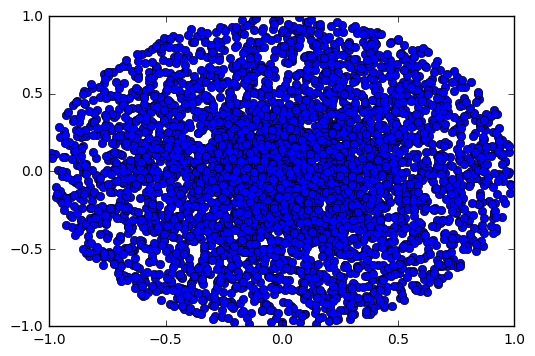

In [7]:
x,y = sample_circle_points(size=5000)
plt.plot(x,y, "o")

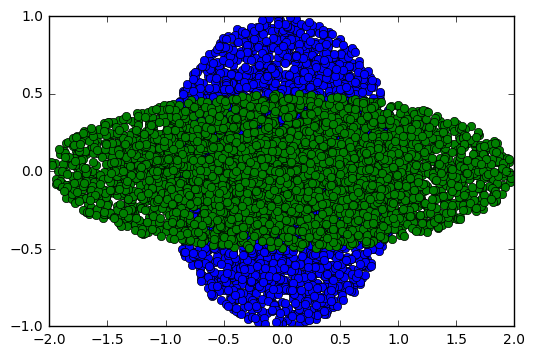

In [8]:
D = strech_compress()
# loop over all (x,y) pairs and transform them by D
transform = [ D.dot(np.array([i,j])) for i,j in zip(x,y)]
# place points back into a plotable form
xx = [i for i,j in transform]; yy = [j for i,j in transform]
plt.plot(x,y, "o")
plt.plot(xx,yy, "o") # Square is now back in place 

#  Putting it All Together (Symmetric Matrices)

We can combine rotation and diagonal matrices to rotate along specific directions in the following way:

\begin{equation}
R^{-t}D R v
\end{equation}

Basically we first rotsate along the axis we want to strech by then we strech along it and then we rotate back. Overall we can just create a matrix $A=R^{-t}D R$ and apply it directly to $v$.

$R^t$ is the transpose of matrix $R$ and in the case of rotation matrices its equivalent to rotating in the oposite direction to $R$ .

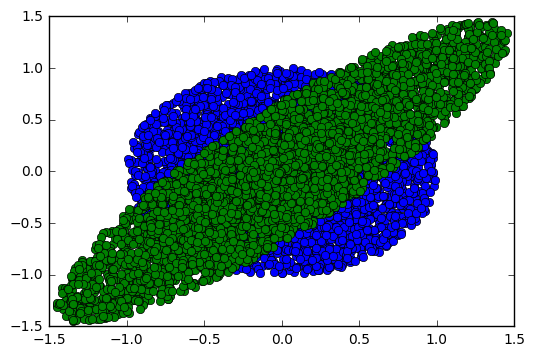

In [9]:
A = R.T.dot(D.dot(R))
transform = [ A.dot(np.array([i,j])) for i,j in zip(x,y)]
xx = [i for i,j in transform]
yy = [j for i,j in transform]
plt.plot(x,y, "o")
plt.plot(xx,yy, "o")

In [ ]:
from sklearn.linear_model SGDClassifier

model =  SGDClassifier()